In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost
import pandas as pd
from tqdm import tqdm
from datetime import datetime as dpa
import pickle
from src.utils.QueryData import GetMinute
from src.utils.convert_data_type import convertStrtoDate, convertToDayMonth, convertToMonthYear, convertToDayWeek, convertToHour
from src.utils.encodeData import labelEncoder

data = pd.read_csv('/home/ai_car/AthenaBow/data/TotalData.csv')
data = data.drop(columns=['STT', 'CallID', 'Hotline', 'QC User Say', 'QC Intent', 'Đánh giá Intent', 'Tỷ lệ nhận diện STT', 'Đánh giá STT', 'Audio', 'Đơn giá', 'CUSTOMER'])
data = data.drop(columns=['Intent', 'Độ tự tin (%)', 'Entities', 'Entity Value', 'QC Độ trễ', 'Số khách hàng', 'Mã kết thúc bot'])
data = data.drop(columns=['Action', 'Bot Process (ms)', 'TTS Process (ms)', 'User Say', 'Time in call', 'ASR Process (ms)'])
# data = data.drop(columns=['CURRES_PHONE'])
data = data.drop(columns=['MOB', 'DPD', 'REMAINING_PEROID'])
data = data.drop(columns=['TENURE', 'RELATIONSHIP_2', 'PHONE_REF3', 'NAME_3', 'RELATIONSHIP_3', 'PERMNENT_PROVINCE', 'RELATIONSHIP_1', 'PHONE_REF2', 'NAME_2'])
data = data.drop(columns=['NAME_1', 'DISBURSALDATE', 'PHONE_REF1', 'MAX_DPD', 'DUEDAY', 'FIRST_PAID_DATE'])
data = data.drop(columns=['Mã tổng đài', 'AMOUNT_FINANCE', 'GENDER', 'Thời lượng gọi'])
data = data.drop(columns=['AGREEMENTID'])
data = data.drop_duplicates(ignore_index= True)

data = data.dropna()
data = data.reset_index(drop=True)
def convertPhone(data):
    listPhone = []
    for i in tqdm(range(len(data['CURRES_PHONE']))):
        listPhone.append(int(data['CURRES_PHONE'][i]))
    return listPhone
data['CURRES_PHONE'] = convertPhone(data)

data.rename(columns = {'Trạng thái':'Result'}, inplace = True)
def encodeTimeCall(data):
    listEncode = []
    for i in tqdm(range(len(data['Thời điểm gọi']))):
        a = dpa.strptime(data['Thời điểm gọi'][i], '%Y-%m-%d %H:%M:%S')
        listEncode.append(a)
    return listEncode
data['Thời điểm gọi'] = encodeTimeCall(data)

def convertDateYeartoDays(data):
    DayofWeeks = []
    for i in tqdm(range(len(data['Thời điểm gọi']))):
        DayofWeeks.append(convertToDayWeek(data, i))
    return DayofWeeks
data['DayofWeek'] = convertDateYeartoDays(data)

def convertToTime(data):
    hourToCall = []
    for i in tqdm(range(len(data['Thời điểm gọi']))):
        hourToCall.append(convertToHour(data, i))
    return hourToCall
data['TimeCall'] = convertToTime(data)

def labelEncoder(data):
    encoderLabel = []
    for i in tqdm(range(len(data['Result']))):
        if data['Result'][i] == 'Không thành công' or data['Result'][i] == 'Lỗi':
            encoderLabel.append(0)
        elif data['Result'][i] == 'Nghe máy':
            encoderLabel.append(1)
    return encoderLabel

data['Result'] = labelEncoder(data)

def encodeProduct(data):
    encoder = []
    for i in tqdm(range(len(data['PRODUCT']))):
        if data['PRODUCT'][i] == 'Cash Loan':
            encoder.append(0)
        elif data['PRODUCT'][i] == 'TOPUP - XSELL':
            encoder.append(1)
        elif data['PRODUCT'][i] == 'CONSUMER DURABLE LOAN':
            encoder.append(2)
        elif data['PRODUCT'][i] == 'TWO-WHEEL LOAN':
            encoder.append(3)
        elif data['PRODUCT'][i] == 'MA EMPLOYEE CASH LOAN':
            encoder.append(4)
        elif data['PRODUCT'][i] == 'SERVICE PACKAGE LOAN':
            encoder.append(5)
        elif data['PRODUCT'][i] == 'AUTO LOAN':
            encoder.append(6)
    return encoder
data['PRODUCT'] = encodeProduct(data)

def convertDayMonth(data):
    DayToCall = []
    for i in tqdm(range(len(data['Thời điểm gọi']))):
        DayToCall.append(convertToDayMonth(data, i))
    return DayToCall

data['DateCall'] = convertDayMonth(data)

def convertMonthMonthYear(data):
    MonthToCall = []
    for i in tqdm(range(len(data['Thời điểm gọi']))):
        MonthToCall.append(convertToMonthYear(data, i))
    return MonthToCall

data['MonthCall'] = convertMonthMonthYear(data)
listMinute = []
for i in tqdm(range(len(data['Thời điểm gọi']))):
    listMinute.append(int(GetMinute(data, i)))
len(listMinute)

100%|██████████| 1015852/1015852 [00:08<00:00, 114013.34it/s]


1015852

In [3]:
print(f"{data.TimeCall.isna().sum()}, {data.PRODUCT.isna().sum()}, {data.NC.isna().sum()}")
print(data.Result.value_counts())
data = data.drop(columns=['Thời điểm gọi', 'DayofWeek'])
data

0, 0, 0
1    548140
0    467712
Name: Result, dtype: int64


,Result,CURRES_PHONE,PRODUCT,NC,TimeCall,DateCall,MonthCall
0,1,948906338,0,2022988.00,10,1,1
1,1,378688785,2,2401572.00,9,1,1
2,1,946951819,1,1214182.00,16,1,1
3,1,908699508,5,2500000.00,9,1,1
4,1,905276356,0,1045860.00,16,1,1
...,...,...,...,...,...,...,...
1015847,0,903957747,1,2227758.00,17,30,6
1015848,1,965254687,0,2040518.00,20,30,6
1015849,1,982453701,2,1765233.00,14,30,6
1015850,1,358065457,0,1872939.00,9,30,6


In [4]:
listTimeEncode = []
for i in tqdm(range(len(data['TimeCall']))):
    listTimeEncode.append(int(int(data['TimeCall'][i]) * 60) + int(listMinute[i]))
len(listTimeEncode)
data['TimeCall'] = listTimeEncode

y = data.Result
x = data.drop(columns=['Result'])
x, y

100%|██████████| 1015852/1015852 [00:05<00:00, 184188.86it/s]


(         CURRES_PHONE  PRODUCT         NC  TimeCall  DateCall  MonthCall
 0           948906338        0 2022988.00       654         1          1
 1           378688785        2 2401572.00       591         1          1
 2           946951819        1 1214182.00       962         1          1
 3           908699508        5 2500000.00       585         1          1
 4           905276356        0 1045860.00      1012         1          1
 ...               ...      ...        ...       ...       ...        ...
 1015847     903957747        1 2227758.00      1056        30          6
 1015848     965254687        0 2040518.00      1217        30          6
 1015849     982453701        2 1765233.00       891        30          6
 1015850     358065457        0 1872939.00       596        30          6
 1015851     768424804        2 2366450.00      1152        30          6
 
 [1015852 rows x 6 columns],
 0          1
 1          1
 2          1
 3          1
 4          1
           

In [8]:
CallCenter = xgboost.DMatrix(data=x, label=y)

In [5]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import numpy as np
import xgboost as xgb
from matplotlib.pylab import rcParams
from sklearn import metrics
rcParams['figure.figsize'] = 12, 4

In [13]:
# data['DayofWeek'].value_counts()

4    12207
3    10858
2     9651
7     9446
8     9332
6      839
5        3
Name: DayofWeek, dtype: int64

In [6]:
target = 'Result'
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(data= dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors].values, dtrain['Result'].values,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Result'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Result'], dtrain_predprob))
                    

In [7]:
predictors = [a for a in data.columns if a not in [target]]
xgb1 = XGBClassifier(tree_method='gpu_hist', gpu_id=0,
 learning_rate =0.03,
 n_estimators=1000,
 max_depth=25,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, data, predictors)


Model Report
Accuracy : 0.8833
AUC Score (Train): 0.965014


In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(tree_method='gpu_hist', gpu_id=0, learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(data[predictors],data[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [9]:
pickle.dump(xgb1, open("/home/ai_car/AthenaBow/model/24-12/xgb.sav", "wb"))

# xgb_reg = pickle.load(open("/home/ai_car/AthenaBow/model/xgb.sav", "rb"))
# preds = xgb_reg.predict([[3216308, 5, 5985334, 7, 8]])
# preds

In [20]:
preds = xgb1.predict_proba([[3216308, 5, 5985334, 7, 8]])
preds

array([[0.44808543, 0.5519146 ]], dtype=float32)

In [18]:
preds = preds.tolist()
preds

[[0.4480854272842407, 0.5519145727157593]]

In [22]:
preds[0][1]

0.5519146

In [19]:
preds[0].inde,x(max(preds[0]))

1

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( tree_method='gpu_hist', gpu_id=0,learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(data[predictors],data[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( tree_method='gpu_hist', gpu_id=0,learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(data[predictors],data[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

In [1]:
xgb2 = XGBClassifier(
 tree_method='gpu_hist', gpu_id=0,
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=20,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, data, predictors)

NameError: name 'XGBClassifier' is not defined

In [20]:
pickle.dump(xgb2, open("/home/ai_car/AthenaBow/model/newest/xgb2Day.sav", "wb"))
# xgb_reg = pickle.load(open("/home/ai_car/AthenaBow/model/xgb_NODay.sav", "rb"))
# preds = xgb_reg.predict([[3216308, 5, 5985334, 480]])
# preds

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import time
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

train_X, test_X, train_y, test_y = train_test_split(x.values, y.values, test_size=0.3, random_state= 123) # By default shuffle is true

my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)
# start_time = time.time()

# initial_model = xgb.XGBClassifier(n_estimators=1000, 
#                         max_depth=10, 
#                         learning_rate=0.01, 
#                         subsample=0.7,
#                         colsample_bytree=0.8, 
#                         colsample_bylevel=0.8, 
#                         base_score=train_y.mean(),
#                         tree_method= 'gpu_hist',
#                         gpu_id = 0,
#                         random_state=42, seed=42)

# init_mod = initial_model.fit(train_X, train_y, 
#                     early_stopping_rounds=10, 
#                     eval_set=[(test_X, test_y)], eval_metric='error', 
#                     verbose=100)

# print("--- %s seconds ---" % (time.time() - start_time))

clf = LazyClassifier(verbose= 1 , ignore_warnings= False, custom_metric= None)
model, prediction = clf.fit(train_X,test_X,train_y,test_y)
print(model)

  3%|▎         | 1/29 [00:26<12:24, 26.58s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7160876241977189, 'Balanced Accuracy': 0.7139686409493207, 'ROC AUC': 0.7139686409493207, 'F1 Score': 0.7159881238581517, 'Time taken': 26.579824686050415}


  7%|▋         | 2/29 [00:59<13:44, 30.52s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.766905327540721, 'Balanced Accuracy': 0.7673449832993977, 'ROC AUC': 0.7673449832993977, 'F1 Score': 0.7672140464247722, 'Time taken': 33.2840735912323}


 10%|█         | 3/29 [01:00<07:21, 16.96s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.6522759190959325, 'Balanced Accuracy': 0.6449342991613864, 'ROC AUC': 0.6449342991613864, 'F1 Score': 0.6489678362821916, 'Time taken': 0.8270270824432373}


 14%|█▍        | 4/29 [11:22<1:46:32, 255.68s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.6761671632387878, 'Balanced Accuracy': 0.6738591455343711, 'ROC AUC': 0.6738591455343711, 'F1 Score': 0.6760757515438094, 'Time taken': 621.6351861953735}


 17%|█▋        | 5/29 [11:22<1:05:25, 163.56s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|██        | 6/29 [11:27<42:05, 109.80s/it]  

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7296755437136595, 'Balanced Accuracy': 0.7282130714741245, 'ROC AUC': 0.7282130714741245, 'F1 Score': 0.7297375134396771, 'Time taken': 5.442734003067017}


 24%|██▍       | 7/29 [11:28<27:09, 74.07s/it] 

{'Model': 'DummyClassifier', 'Accuracy': 0.5395365472706034, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.37816534639176397, 'Time taken': 0.5064091682434082}


 28%|██▊       | 8/29 [11:29<17:48, 50.87s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.7159169958917954, 'Balanced Accuracy': 0.7144193922570892, 'ROC AUC': 0.714419392257089, 'F1 Score': 0.7159954910736498, 'Time taken': 1.1977484226226807}


 31%|███       | 9/29 [12:44<19:24, 58.21s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.764296683248238, 'Balanced Accuracy': 0.7623092250649455, 'ROC AUC': 0.7623092250649455, 'F1 Score': 0.7641681183586108, 'Time taken': 74.33548021316528}


 34%|███▍      | 10/29 [12:44<12:48, 40.47s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.6641477116119124, 'Balanced Accuracy': 0.665345002293432, 'ROC AUC': 0.665345002293432, 'F1 Score': 0.664671996105753, 'Time taken': 0.7644054889678955}


 38%|███▊      | 11/29 [13:03<10:10, 33.92s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7630530654031422, 'Balanced Accuracy': 0.7613139178170749, 'ROC AUC': 0.7613139178170749, 'F1 Score': 0.7629918780828608, 'Time taken': 19.063607454299927}


 41%|████▏     | 12/29 [13:04<06:43, 23.71s/it]

LabelPropagation model failed to execute
Unable to allocate 3.68 TiB for an array with shape (711096, 711096) and data type float64


 45%|████▍     | 13/29 [13:04<04:26, 16.63s/it]

LabelSpreading model failed to execute
Unable to allocate 3.68 TiB for an array with shape (711096, 711096) and data type float64


 48%|████▊     | 14/29 [13:06<03:01, 12.09s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6758751263305727, 'Balanced Accuracy': 0.6742422934422015, 'ROC AUC': 0.6742422934422015, 'F1 Score': 0.6759982813265254, 'Time taken': 1.5858194828033447}


 52%|█████▏    | 15/29 [15:43<13:00, 55.77s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.675950596542808, 'Balanced Accuracy': 0.6742746354502966, 'ROC AUC': 0.6742746354502968, 'F1 Score': 0.6760613400632247, 'Time taken': 157.01175117492676}


 55%|█████▌    | 16/29 [15:44<08:32, 39.45s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.676249196078174, 'Balanced Accuracy': 0.6739597101491513, 'ROC AUC': 0.6739597101491513, 'F1 Score': 0.6761641315998939, 'Time taken': 1.5534718036651611}


 59%|█████▊    | 17/29 [15:45<05:33, 27.81s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.6635341059733032, 'Balanced Accuracy': 0.6667121276450494, 'ROC AUC': 0.6667121276450495, 'F1 Score': 0.6638146548683103, 'Time taken': 0.7299792766571045}


/home/ai_car/anaconda3/envs/Python3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Initial Model without tuning using Xgboost')

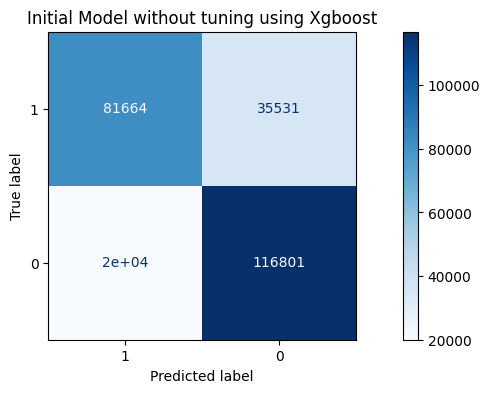

In [20]:
class_names = [1,0]

disp = plot_confusion_matrix(init_mod, test_X, test_y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
plt.title('Initial Model without tuning using Xgboost')

In [21]:
from sklearn.model_selection import RandomizedSearchCV
params = {
        'learning_rate': [0.03, 0.01, 0.003, 0.001],
        'min_child_weight': [1,3, 5,7, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 2.5, 5],
        'subsample': [0.6, 0.8, 1.0, 1.2, 1.4],
        'colsample_bytree': [0.6, 0.8, 1.0, 1.2, 1.4],
        'max_depth': [3, 4, 5, 6, 7, 8, 9 ,10, 12],
        'reg_lambda':np.array([0.4, 0.6, 0.8, 1, 1.2, 1.4])}

# specific parameters. I set early stopping to avoid overfitting and specify the validation dataset 
fit_params = { 
        'early_stopping_rounds':10,
        'eval_set':[(test_X, test_y)]}

# let's run the optimization
random_search = RandomizedSearchCV(init_mod, param_distributions=params, n_iter=500,
                                   scoring="precision", n_jobs=-1,  verbose=3, random_state=42, cv=3 )

In [ ]:
import warnings
import shutup
shutup.please()
random_search.fit(train_X,train_y, **fit_params)
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

In [ ]:
import xgboost as xgb
import time



train_X, test_X, train_y, test_y = train_test_split(x.values, y.values, test_size=0.25) # By default shuffle is true

# my_imputer = SimpleImputer()
# train_X = my_imputer.fit_transform(train_X)
# test_X = my_imputer.transform(test_X)
start_time = time.time()

tuned_model = xgb.XGBClassifier(n_estimators=1000, 
                        max_depth=16, 
                        learning_rate=0.03, 
                        subsample=0.6,
                        colsample_bytree=0.6, 
                        colsample_bylevel=0.8, 
                        gamma=0.5,reg_lambda = 1.4,
#                         objective = 'binary:logistic',
                        base_score=train_y.mean(),
                        tree_method= 'gpu_hist',
                        random_state=42, seed=42)
# 'subsample': 0.6, 'reg_lambda': 1.4, 'min_child_weight': 3, 'max_depth': 16, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 0.6


tuned_mod = tuned_model.fit(train_X, train_y, 
                    early_stopping_rounds=20, 
                    eval_set=[(test_X, test_y)], eval_metric='error', 
                    verbose=100)

print("--- %s seconds ---" % (time.time() - start_time))

[0]	validation_0-error:0.46115
[100]	validation_0-error:0.22490
[200]	validation_0-error:0.21789
[300]	validation_0-error:0.21183
[385]	validation_0-error:0.21012
--- 43.326703786849976 seconds ---


Text(0.5, 1.0, 'Tuned Model')

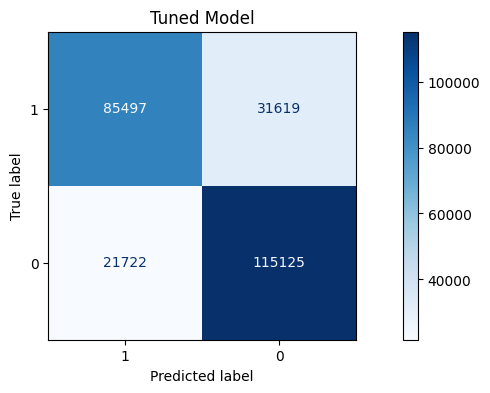

In [ ]:
class_names = ['1','0']

disp = plot_confusion_matrix(tuned_mod, test_X, test_y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
plt.title('Tuned Model')

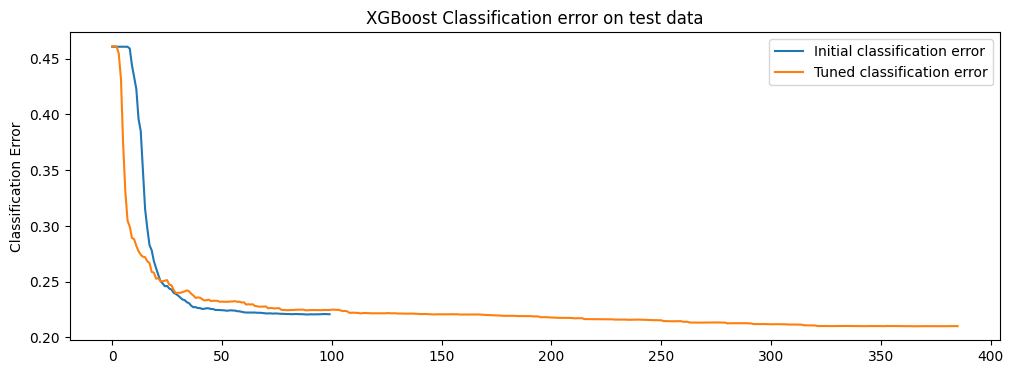

In [ ]:
init_model_res = init_mod.evals_result()
tuned_model_res = tuned_mod.evals_result()
epochs_init = len(init_model_res['validation_0']['error'])
epochs_tuned = len(tuned_model_res['validation_0']['error'])
x_axis_init = range(0, epochs_init)
x_axis_tuned = range(0,epochs_tuned)
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis_init, init_model_res['validation_0']['error'], label='Initial classification error')
ax.plot(x_axis_tuned, tuned_model_res['validation_0']['error'], label='Tuned classification error')

ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification error on test data')
plt.show()

{'f0': 228543.0, 'f1': 21996.0, 'f2': 244675.0, 'f3': 43275.0, 'f4': 88688.0, 'f5': 42481.0}


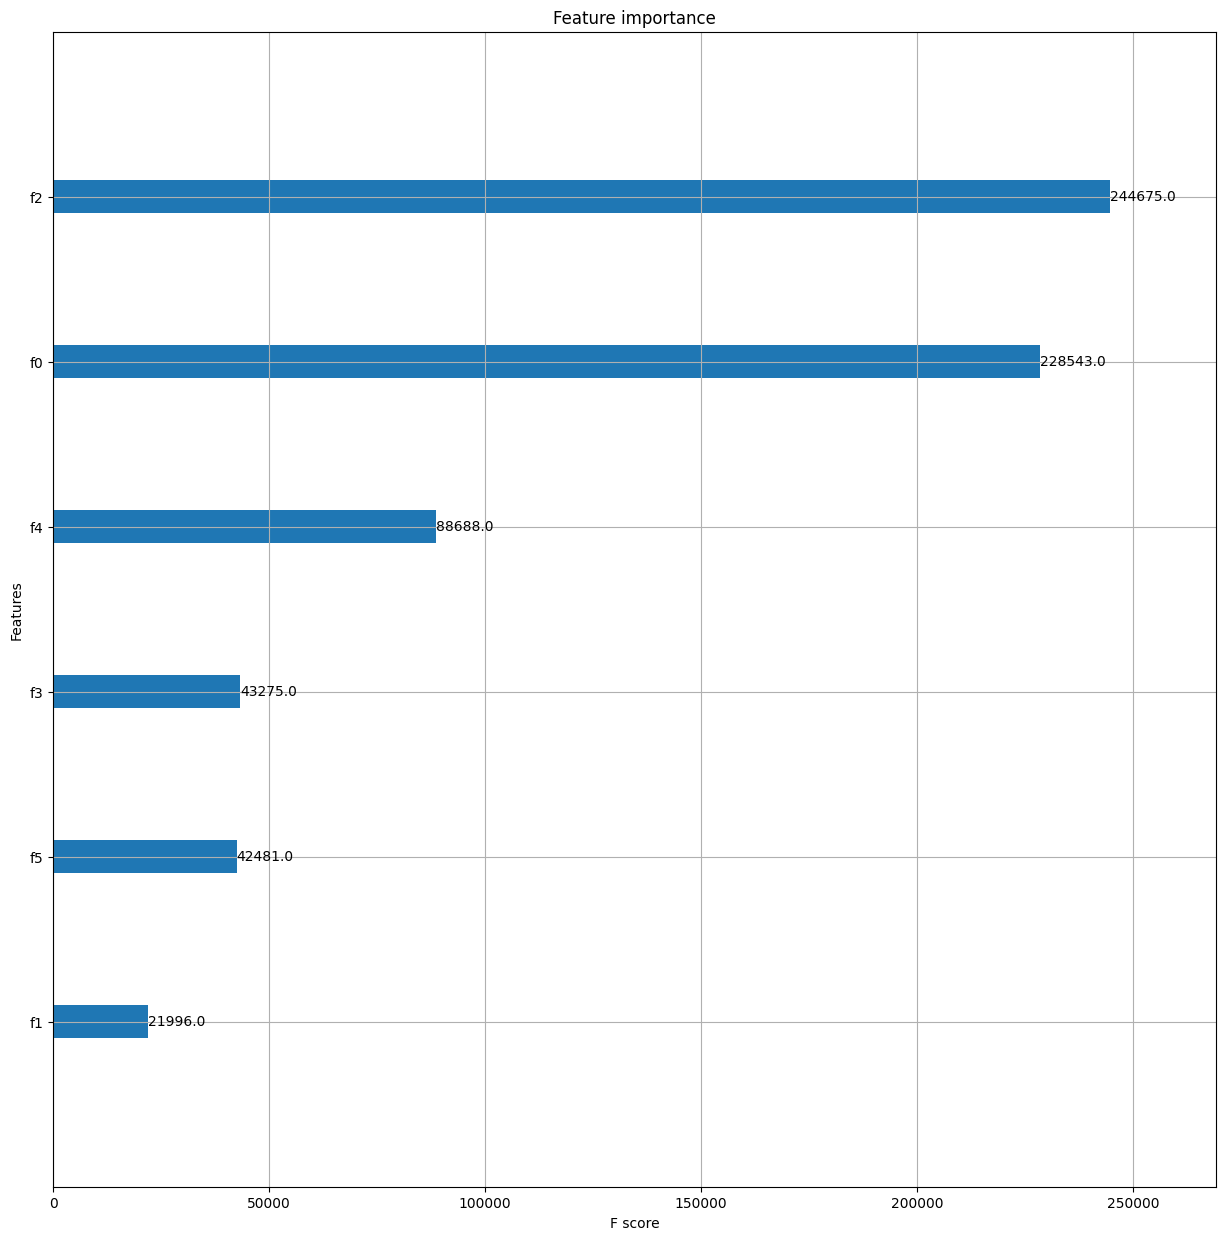

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
print(tuned_mod.get_booster().get_score(importance_type='weight'))

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(tuned_mod,ax=ax,max_num_features=10)
plt.show()

In [ ]:
pickle.dump(tuned_mod, open("/home/ai_car/AthenaBow/model/24-12/tuned_mod.sav", "wb"))

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(tree_method='gpu_hist', gpu_id=0, learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(data[predictors],data[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [36]:
pickle.dump(xgb2, open("/home/ai_car/AthenaBow/model/xgb.sav", "wb"))
xgb_reg = pickle.load(open("/home/ai_car/AthenaBow/model/xgb.sav", "rb"))
preds = xgb_reg.predict([[3216308, 5, 5985334, 7, 8]])
preds

array([1])

In [95]:
xgb4 = XGBClassifier(
    tree_method='gpu_hist', gpu_id=0,
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, data, predictors)

/home/ai_car/anaconda3/envs/Python3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.6918
AUC Score (Train): 0.771293


In [96]:
xgb4.save_model('/home/ai_car/AthenaBow/model/4/model.json')
xgb4.save_model('/home/ai_car/AthenaBow/model/4/model.txt')
xgb2.save_model('/home/ai_car/AthenaBow/model/2/model.json')
xgb2.save_model('/home/ai_car/AthenaBow/model/2/model.txt')
xgb1.save_model('/home/ai_car/AthenaBow/model/1/model.json')
xgb1.save_model('/home/ai_car/AthenaBow/model/1/model.txt')

In [97]:
model_xgb_predict = xgb.Booster()
model_xgb_predict.load_model('/home/ai_car/AthenaBow/model/1/model.json')

In [15]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
train = xgb.DMatrix(X_train, y_train)
test = xgb.DMatrix(X_test, y_test)
# fit model no training data


In [ ]:
params = {
    "learning_rate": 0.01,
    "max_depth": 100,
    "tree_method": 'gpu_hist', 
    "gpu_id": 0,
}
# training, we set the early stopping rounds parameter
model_xgb = xgb.train(params, 
          train, evals=[(train, "train"), (test, "validation")], 
          num_boost_round=1000, early_stopping_rounds=20)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

In [54]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [55]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.24%


In [104]:
listTimeWork = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
dataReal = pd.read_excel()
# Dữ liệu đầu vào là profile customer
def process():
    for i in tqdm(range(len(dataReal))):
        for j in range(len(listTimeWork)):
            model.predict([dataReal[''], dataReal[''], data])


[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]